# Title

**Exercise: A.1 - Linear and Polynomial Regression with Residual Analysis**

# Description

The goal of this exercise is to fit linear regression and polynomial regression to the given data. Plot the fit curves of both the models along with the data and observe what the residuals tell us about the two fits. 

<img src="../img/image.png" style="width: 500px;">

# Instructions
- Read the poly.csv file into a dataframe
- Fit a linear regression model on the entire data, using LinearRegression() object from sklearn library
- Guesstimate the degree of the polynomial which would best fit the data
- Fit a polynomial regression model on the computed PolynomialFeatures using LinearRegression() object from sklearn library
- Plot the linear and polynomial model predictions along with the data
- Compute the polynomial and linear model residuals using the formula below $\epsilon = y_i - \hat{y}$
- Plot the histogram of the residuals and comment on your choice of the polynomial degree. 

# Hints:

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html" target="_blank">df.head()</a> : Returns a pandas dataframe containing the data and labels from the file data.


<a href="https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplots.html" target="_blank">plt.subplots()</a> : Create a figure and a set of subplots.


<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html" target="_blank">sklearn.PolynomialFeatures()</a> : Generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.


<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html" target="_blank">sklearn.fit_transform()</a> : Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.


<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank">sklearn.LinearRegression()</a> : LinearRegression fits a linear model.


<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit" target="_blank">sklearn.fit()</a> : Fits the linear model to the training data.


<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict" target="_blank">sklearn.predict()</a> : Predict using the linear model.


<a href="https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.plot.html" target="_blank">plt.plot()</a> : Plots x versus y as lines and/or markers.


<a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axvline.html" target="_blank">plt.axvline()</a> : Add a vertical line across the axes.


<a href="https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist.html" target="_blank">ax.hist()</a> : Plots a histogram.

**Note: This exercise is auto-graded and you can try multiple attempts.**

In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [7]:
# Read the data from 'poly.csv' to a dataframe
df = pd.read_csv(r"C:\Users\GHTK\Linh\lu\2020-CS109A\content\lectures\lecture07\notebook\poly.csv")
# Get the column values for x & y in numpy arrays
x = df[['x']].values
y = df[['y']].values

In [3]:
# Take a quick look at the dataframe
df.head()

,x,y
0,-3.292157,-46.916988
1,0.799528,-3.941553
2,-0.936214,-2.800522
3,-4.722680,-103.030914
4,-3.602674,-54.020819


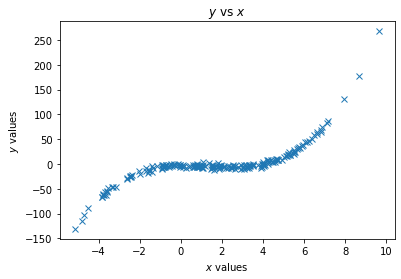

In [22]:
# Plot x & y to visually inspect the data

fig, ax = plt.subplots()
ax.plot(x,y,'x')
ax.set_xlabel('$x$ values')
ax.set_ylabel('$y$ values')
ax.set_title('$y$ vs $x$');

In [23]:
# Fit a linear model on the data
model = LinearRegression()
model.fit(x, y)

# Get the predictions on the entire data using the .predict() function
y_lin_pred = model.predict(x)

In [24]:
### edTest(test_deg) ###
# Now, we try polynomial regression
# GUESS the correct polynomial degree based on the above graph

guess_degree = 3

# Generate polynomial features on the entire data
x_poly= PolynomialFeatures(degree=guess_degree).fit_transform(x)


In [27]:
#Fit a polynomial model on the data, using x_poly as features
polymodel = LinearRegression()
polymodel.fit(x_poly, y)

y_poly_pred = polymodel.predict(x_poly)

In [28]:
# To visualise the results, sort the x values using the helper code below
# Worth examining and understand the code 

idx = np.argsort(x[:,0])
x = x[idx]

# Use the above index to get the appropriate predicted values for y
# y values corresponding to sorted x
y = y[idx]

#Linear predicted values  
y_lin_pred = y_lin_pred[idx]

#Non-linear predicted values
y_poly_pred= y_poly_pred[idx]

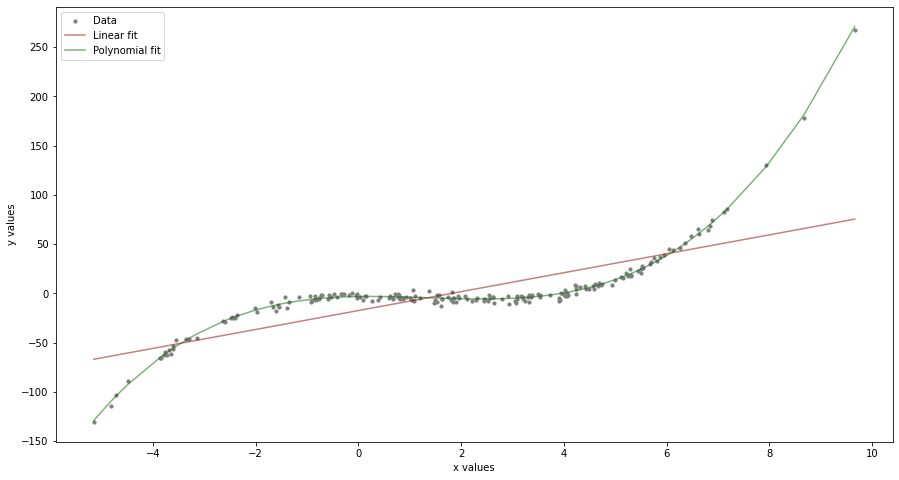

In [31]:
# First plot x & y values using plt.scatter
plt.figure(figsize=(15, 8))
plt.scatter(x, y, s=10, label="Data", color='grey')

# Now, plot the linear regression fit curve
plt.plot(x, y_lin_pred,label="Linear fit", color='darkred', alpha=0.5)

# Also plot the polynomial regression fit curve
plt.plot(x, y_poly_pred, label="Polynomial fit", color='darkgreen', alpha=0.5)

#Assigning labels to the axes
plt.xlabel("x values")
plt.ylabel("y values")
plt.legend()
plt.show()

In [32]:
### edTest(test_poly_predictions) ###
#Calculate the residual values for the polynomial model
poly_residuals = y_poly_pred - y


In [33]:
### edTest(test_linear_predictions) ###
#Calculate the residual values for the linear model
lin_residuals = y_lin_pred - y

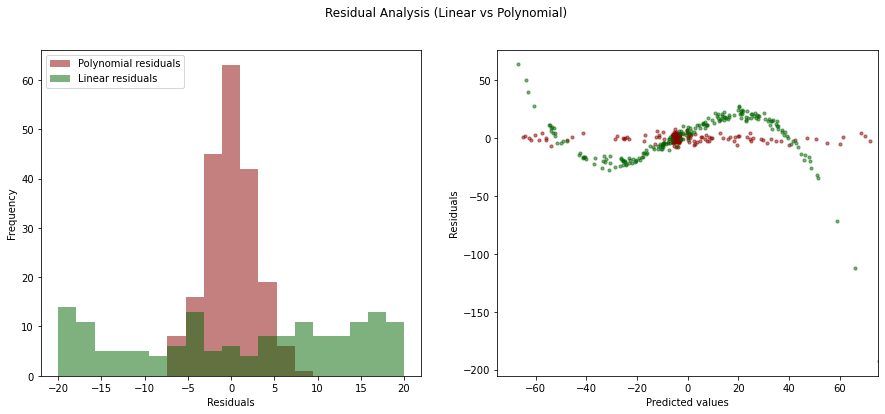

In [38]:
#Use the below helper code to plot residual values
#Plot the histograms of the residuals for the two cases

#Distribution of residuals
fig, ax = plt.subplots(1,2, figsize = (15,6))
bins = np.linspace(-20,20,20)
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')

#Plot the histograms for the polynomial regression
ax[0].hist(poly_residuals, bins,label = 'Polynomial residuals', color='darkred', alpha=0.5)

#Plot the histograms for the linear regression
ax[0].hist(lin_residuals, bins, label = 'Linear residuals', color='darkgreen', alpha=0.5)

ax[0].legend(loc = 'upper left')

# Distribution of predicted values with the residuals
ax[1].scatter(y_poly_pred, poly_residuals, s=10, color='darkred', alpha=0.5)
ax[1].scatter(y_lin_pred, lin_residuals, s = 10, color='darkgreen', alpha=0.5 )
ax[1].set_xlim(-75,75)
ax[1].set_xlabel('Predicted values')
ax[1].set_ylabel('Residuals')

fig.suptitle('Residual Analysis (Linear vs Polynomial)');

## Question: 
Do you think that polynomial degree is appropriate. Experiment with a degree of polynomial =2 and comment on what you observe for the residuals.